A lab to analyse the effectiveness of a Stochastic Gradient classifier vs a Support Vector classifier in classifying Japanese forest types, using "spectral information in the green, red, and near infrared wavelengths" as predictors.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

training = pd.read_csv("training.csv")
testing = pd.read_csv("testing.csv")

## Viewing the Data

In [2]:
training.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


In [3]:
training.describe()

,b1,b2,b3,b4,b5,b6,b7,b8,b9,pred_minus_obs_H_b1,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,58.021538,38.381538,61.467692,96.175385,58.098462,99.196923,85.864615,27.375385,58.880000,55.786769,...,-3.341446,-20.004954,-1.086092,-4.375846,-21.664185,-0.979815,-4.633323,-18.996462,-1.701785,-4.229108
std,11.705076,14.589516,15.003385,11.120136,10.654920,9.438789,16.642765,7.445316,8.884777,12.347445,...,8.921301,2.908311,1.054544,1.850954,3.594512,0.308081,1.054033,3.307265,1.017594,1.150070
min,31.000000,23.000000,47.000000,69.000000,43.000000,83.000000,42.000000,19.000000,45.000000,4.950000,...,-58.280000,-26.790000,-5.510000,-10.120000,-34.630000,-1.830000,-7.970000,-29.340000,-6.500000,-8.930000
25%,50.000000,28.000000,52.000000,89.000000,51.000000,93.000000,73.000000,24.000000,54.000000,48.370000,...,-4.660000,-22.250000,-1.750000,-5.530000,-24.220000,-1.190000,-5.410000,-21.780000,-2.360000,-4.870000
50%,57.000000,32.000000,55.000000,95.000000,54.000000,96.000000,85.000000,25.000000,57.000000,57.560000,...,-1.250000,-19.950000,-1.030000,-4.490000,-21.040000,-0.990000,-4.670000,-18.870000,-1.650000,-4.150000
75%,65.000000,43.000000,65.000000,103.000000,63.000000,103.000000,98.000000,27.000000,60.000000,64.120000,...,1.430000,-18.250000,-0.390000,-2.770000,-19.060000,-0.780000,-3.900000,-16.770000,-1.030000,-3.290000
max,107.000000,91.000000,124.000000,141.000000,100.000000,138.000000,136.000000,84.000000,114.000000,86.080000,...,9.580000,-7.760000,1.780000,1.040000,-12.070000,0.260000,-0.770000,-8.330000,2.580000,-0.590000


We can see that each row contains a class, denoting its forest type, and then a set of numeric values that outline spectral information. All numeric attributes have a count of 325, no data cleaning necessary.

array([[<AxesSubplot:title={'center':'b1'}>,
        <AxesSubplot:title={'center':'b2'}>,
        <AxesSubplot:title={'center':'b3'}>,
        <AxesSubplot:title={'center':'b4'}>,
        <AxesSubplot:title={'center':'b5'}>],
       [<AxesSubplot:title={'center':'b6'}>,
        <AxesSubplot:title={'center':'b7'}>,
        <AxesSubplot:title={'center':'b8'}>,
        <AxesSubplot:title={'center':'b9'}>,
        <AxesSubplot:title={'center':'pred_minus_obs_H_b1'}>],
       [<AxesSubplot:title={'center':'pred_minus_obs_H_b2'}>,
        <AxesSubplot:title={'center':'pred_minus_obs_H_b3'}>,
        <AxesSubplot:title={'center':'pred_minus_obs_H_b4'}>,
        <AxesSubplot:title={'center':'pred_minus_obs_H_b5'}>,
        <AxesSubplot:title={'center':'pred_minus_obs_H_b6'}>],
       [<AxesSubplot:title={'center':'pred_minus_obs_H_b7'}>,
        <AxesSubplot:title={'center':'pred_minus_obs_H_b8'}>,
        <AxesSubplot:title={'center':'pred_minus_obs_H_b9'}>,
        <AxesSubplot:title={'cente

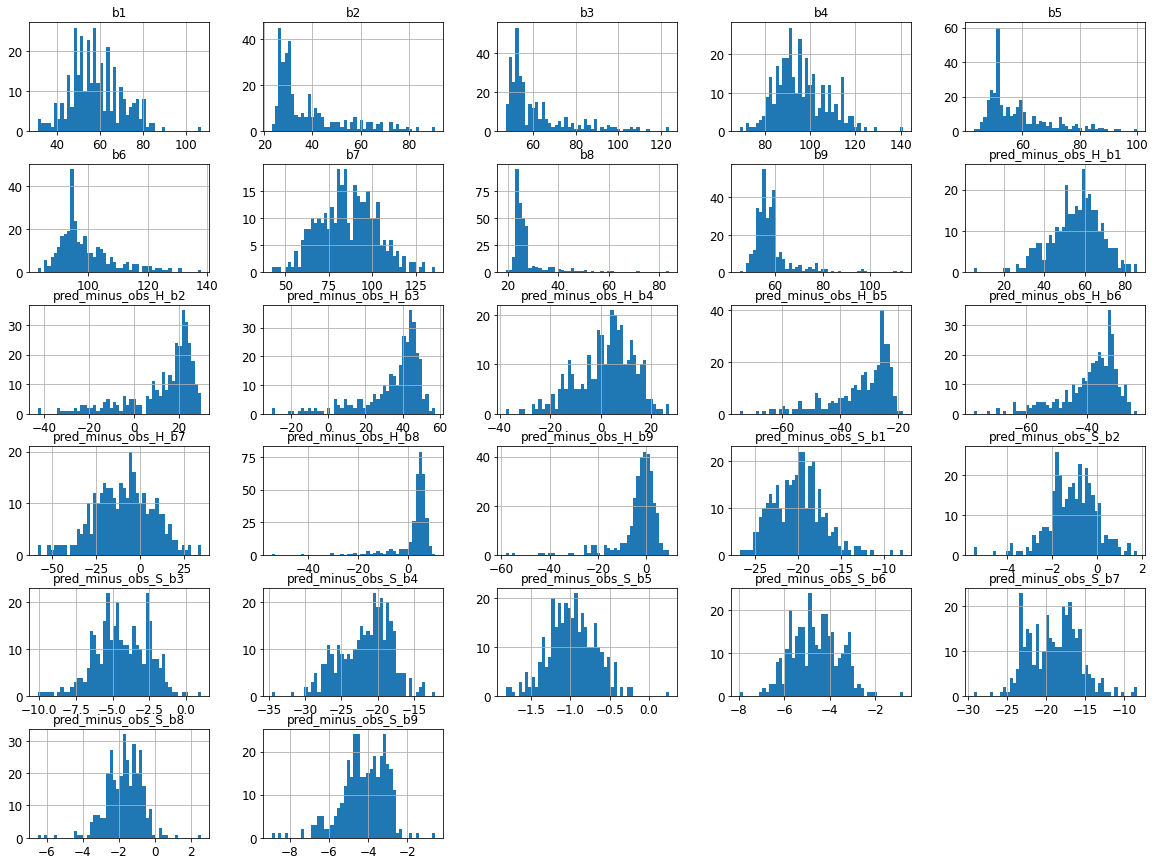

In [4]:
training.hist(bins=50, figsize=(20,15))

The majority of histograms for each numeric attribute seem to be bell shaped, left skewed or right skewed.

array([[<AxesSubplot:title={'center':'b1'}>,
        <AxesSubplot:title={'center':'b2'}>,
        <AxesSubplot:title={'center':'b3'}>],
       [<AxesSubplot:title={'center':'b4'}>,
        <AxesSubplot:title={'center':'b5'}>,
        <AxesSubplot:title={'center':'b6'}>],
       [<AxesSubplot:title={'center':'b7'}>,
        <AxesSubplot:title={'center':'b8'}>,
        <AxesSubplot:title={'center':'b9'}>]], dtype=object)

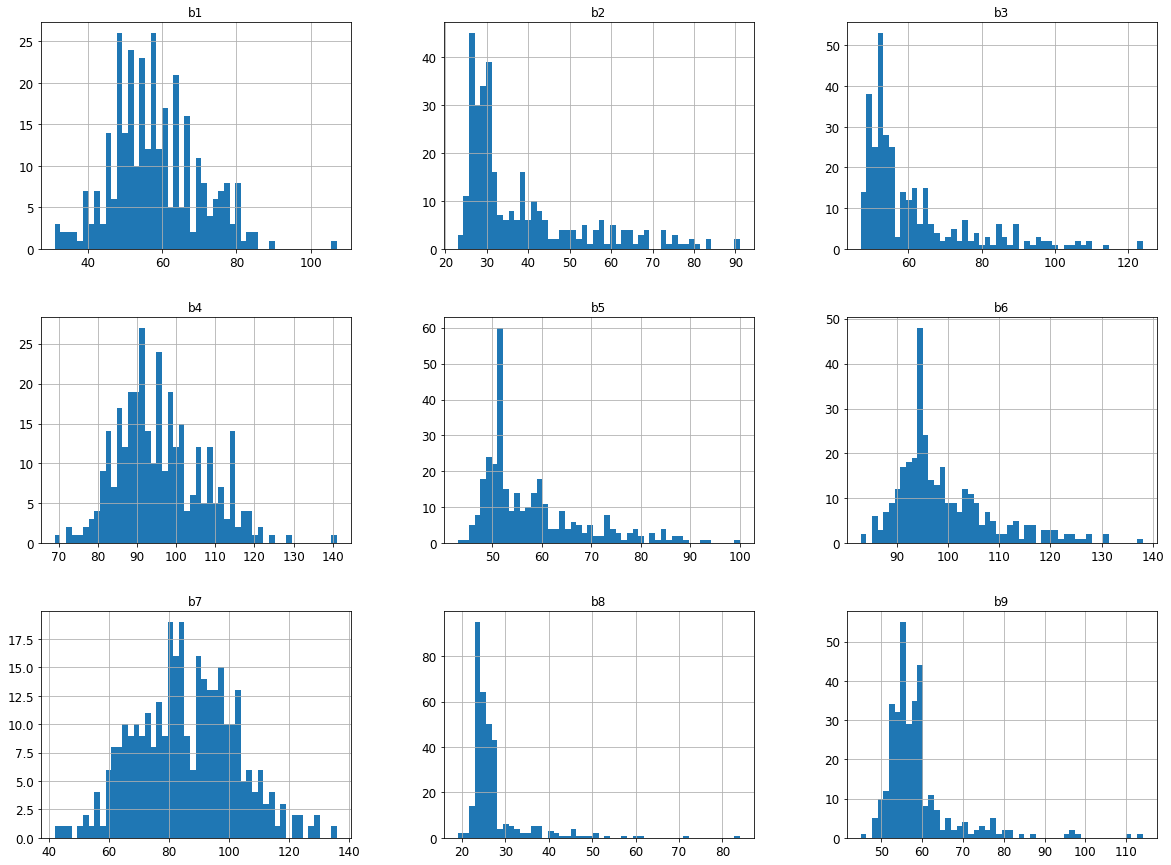

In [5]:
#finding columns starting with pred_minus_obs
predColumns=[]
for col in training.columns:
    if (col.startswith("pred_minus_obs")):
        predColumns.append(col)
        
#removing pred_minus_obs columns from both test and training sets
training = training.drop(predColumns, axis=1)
testing = testing.drop(predColumns, axis=1)

training.hist(bins=50, figsize=(20,15))

In [6]:
training["class"].value_counts()

s    136
d    105
o     46
h     38
Name: class, dtype: int64

There is an uneven balance of classes within the set. There are many more "s" and "d" forest types in this training set than "o" and "h" forest types.

## Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

training_num = training.drop(["class"], axis=1)
testing_num = testing.drop(["class"], axis=1)

S_training = scaler.fit_transform(training_num)
S_testing = scaler.fit_transform(testing_num)

training_X = pd.DataFrame(S_training, columns=training_num.columns)
training_y = training["class"]


testing_X = pd.DataFrame(S_testing, columns=testing_num.columns)
testing_y = testing["class"]


Creating training and testing X and y sets, making sure all numeric columns are min-max scaled.

## Support Vector Classifier

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc =  SVC(kernel="rbf", gamma=1, C=1, tol=0.001, decision_function_shape = "ovo")

grid = [{'C':[0.001, 0.01, 0.1, 0.5, 1, 2, 5, 50], 'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1, 2,5,50]}]

#3 fold 1v1 grid searching
grid_search = GridSearchCV(svc, grid, cv=3, scoring='accuracy', verbose=3)
grid_search.fit(training_X, training_y)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................ C=0.001, gamma=0.001, score=0.422, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................ C=0.001, gamma=0.001, score=0.417, total=   0.0s
[CV] C=0.001, gamma=0.001 ............................................
[CV] ................ C=0.001, gamma=0.001, score=0.417, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ................. C=0.001, gamma=0.01, score=0.422, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ................. C=0.001, gamma=0.01, score=0.417, total=   0.0s
[CV] C=0.001, gamma=0.01 .............................................
[CV] ................. C=0.001, gamma=0.01, score=0.417, total=   0.0s
[CV] C=0.001, gamma=0.05 .............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.01, gamma=1, score=0.417, total=   0.0s
[CV] C=0.01, gamma=2 .................................................
[CV] ..................... C=0.01, gamma=2, score=0.422, total=   0.0s
[CV] C=0.01, gamma=2 .................................................
[CV] ..................... C=0.01, gamma=2, score=0.417, total=   0.0s
[CV] C=0.01, gamma=2 .................................................
[CV] ..................... C=0.01, gamma=2, score=0.417, total=   0.0s
[CV] C=0.01, gamma=5 .................................................
[CV] ..................... C=0.01, gamma=5, score=0.422, total=   0.0s
[CV] C=0.01, gamma=5 .................................................
[CV] ..................... C=0.01, gamma=5, score=0.417, total=   0.0s
[CV] C=0.01, gamma=5 .................................................
[CV] ..................... C=0.01, gamma=5, score=0.417, total=   0.0s
[CV] C=0.01, gamma=50 ................................................
[CV] .

[CV] ...................... C=2, gamma=0.1, score=0.789, total=   0.0s
[CV] C=2, gamma=0.1 ..................................................
[CV] ...................... C=2, gamma=0.1, score=0.787, total=   0.0s
[CV] C=2, gamma=0.1 ..................................................
[CV] ...................... C=2, gamma=0.1, score=0.731, total=   0.0s
[CV] C=2, gamma=0.5 ..................................................
[CV] ...................... C=2, gamma=0.5, score=0.835, total=   0.0s
[CV] C=2, gamma=0.5 ..................................................
[CV] ...................... C=2, gamma=0.5, score=0.889, total=   0.0s
[CV] C=2, gamma=0.5 ..................................................
[CV] ...................... C=2, gamma=0.5, score=0.843, total=   0.0s
[CV] C=2, gamma=1 ....................................................
[CV] ........................ C=2, gamma=1, score=0.844, total=   0.0s
[CV] C=2, gamma=1 ....................................................
[CV] .

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    0.9s finished


GridSearchCV(cv=3, estimator=SVC(C=1, decision_function_shape='ovo', gamma=1),
             param_grid=[{'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 50],
                          'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 50]}],
             scoring='accuracy', verbose=3)

In [9]:
grid_search.best_params_

{'C': 50, 'gamma': 0.5}

Calculated rough good values of C (regularisation parameter) and gamma (kernel coefficient) using a grid search. Set decision shape to 'ovo' to indicate one-verse-one strategy is used. Low tol value set to ensure we are close enough to best values. Shrinking left as default true to shorten training time.

In [10]:
grid2 = [{'C':[20, 25, 30, 35, 40, 45, 50, 55], 'gamma':[0.3, 0.4, 0.45, 0.5, 0.52, 0.54, 0.55, 0.56, 0.6]}]
grid_search = GridSearchCV(svc, grid2, cv=3, scoring='accuracy', verbose=3)
grid_search.fit(training_X, training_y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] C=20, gamma=0.3 .................................................
[CV] ..................... C=20, gamma=0.3, score=0.853, total=   0.0s
[CV] C=20, gamma=0.3 .................................................
[CV] ..................... C=20, gamma=0.3, score=0.889, total=   0.0s
[CV] C=20, gamma=0.3 .................................................
[CV] ..................... C=20, gamma=0.3, score=0.889, total=   0.0s
[CV] C=20, gamma=0.4 .................................................
[CV] ..................... C=20, gamma=0.4, score=0.862, total=   0.0s
[CV] C=20, gamma=0.4 .................................................
[CV] ..................... C=20, gamma=0.4, score=0.898, total=   0.0s
[CV] C=20, gamma=0.4 .................................................
[CV] ..................... C=20, gamma=0.4, score=0.880, total=   0.0s
[CV] C=20, gamma=0.45 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=20, gamma=0.52, score=0.890, total=   0.0s
[CV] C=20, gamma=0.52 ................................................
[CV] .................... C=20, gamma=0.52, score=0.907, total=   0.0s
[CV] C=20, gamma=0.52 ................................................
[CV] .................... C=20, gamma=0.52, score=0.880, total=   0.0s
[CV] C=20, gamma=0.54 ................................................
[CV] .................... C=20, gamma=0.54, score=0.890, total=   0.0s
[CV] C=20, gamma=0.54 ................................................
[CV] .................... C=20, gamma=0.54, score=0.907, total=   0.0s
[CV] C=20, gamma=0.54 ................................................
[CV] .................... C=20, gamma=0.54, score=0.880, total=   0.0s
[CV] C=20, gamma=0.55 ................................................
[CV] .................... C=20, gamma=0.55, score=0.890, total=   0.0s
[CV] C=20, gamma=0.55 ................................................
[CV] .

[CV] ..................... C=40, gamma=0.3, score=0.907, total=   0.0s
[CV] C=40, gamma=0.3 .................................................
[CV] ..................... C=40, gamma=0.3, score=0.880, total=   0.0s
[CV] C=40, gamma=0.4 .................................................
[CV] ..................... C=40, gamma=0.4, score=0.899, total=   0.0s
[CV] C=40, gamma=0.4 .................................................
[CV] ..................... C=40, gamma=0.4, score=0.917, total=   0.0s
[CV] C=40, gamma=0.4 .................................................
[CV] ..................... C=40, gamma=0.4, score=0.880, total=   0.0s
[CV] C=40, gamma=0.45 ................................................
[CV] .................... C=40, gamma=0.45, score=0.899, total=   0.0s
[CV] C=40, gamma=0.45 ................................................
[CV] .................... C=40, gamma=0.45, score=0.917, total=   0.0s
[CV] C=40, gamma=0.45 ................................................
[CV] .

[CV] .................... C=50, gamma=0.45, score=0.861, total=   0.0s
[CV] C=50, gamma=0.5 .................................................
[CV] ..................... C=50, gamma=0.5, score=0.890, total=   0.0s
[CV] C=50, gamma=0.5 .................................................
[CV] ..................... C=50, gamma=0.5, score=0.907, total=   0.0s
[CV] C=50, gamma=0.5 .................................................
[CV] ..................... C=50, gamma=0.5, score=0.861, total=   0.0s
[CV] C=50, gamma=0.52 ................................................
[CV] .................... C=50, gamma=0.52, score=0.881, total=   0.0s
[CV] C=50, gamma=0.52 ................................................
[CV] .................... C=50, gamma=0.52, score=0.907, total=   0.0s
[CV] C=50, gamma=0.52 ................................................
[CV] .................... C=50, gamma=0.52, score=0.861, total=   0.0s
[CV] C=50, gamma=0.54 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    0.9s finished


GridSearchCV(cv=3, estimator=SVC(C=1, decision_function_shape='ovo', gamma=1),
             param_grid=[{'C': [20, 25, 30, 35, 40, 45, 50, 55],
                          'gamma': [0.3, 0.4, 0.45, 0.5, 0.52, 0.54, 0.55, 0.56,
                                    0.6]}],
             scoring='accuracy', verbose=3)

In [11]:
grid_search.best_params_

{'C': 25, 'gamma': 0.54}

In [12]:
svc_best = SVC(kernel="rbf", tol=0.001, C=25, gamma=0.54, decision_function_shape = "ovo").fit(training_X, training_y)

Good values of C and gamma found by testing parameters close to our best ones previously found. Our final svc model is set with these new best parameters.

## Stoachastic Gradient Descent Classifier

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, alpha=1, random_state=42, penalty="elasticnet")

grid3 = [{'tol':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 'alpha':[0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1]}]
grid_search_sgd = GridSearchCV(sgd_clf, grid3, cv=3, scoring='accuracy', verbose=3)
grid_search_sgd.fit(training_X, training_y)

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV] alpha=1e-06, tol=1e-05 ..........................................
[CV] .............. alpha=1e-06, tol=1e-05, score=0.817, total=   0.0s
[CV] alpha=1e-06, tol=1e-05 ..........................................
[CV] .............. alpha=1e-06, tol=1e-05, score=0.778, total=   0.0s
[CV] alpha=1e-06, tol=1e-05 ..........................................
[CV] .............. alpha=1e-06, tol=1e-05, score=0.769, total=   0.0s
[CV] alpha=1e-06, tol=0.0001 .........................................
[CV] ............. alpha=1e-06, tol=0.0001, score=0.817, total=   0.0s
[CV] alpha=1e-06, tol=0.0001 .........................................
[CV] ............. alpha=1e-06, tol=0.0001, score=0.778, total=   0.0s
[CV] alpha=1e-06, tol=0.0001 .........................................
[CV] ............. alpha=1e-06, tol=0.0001, score=0.769, total=   0.0s
[CV] alpha=1e-06, tol=0.001 ..........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................ alpha=1e-05, tol=0.1, score=0.890, total=   0.0s
[CV] alpha=1e-05, tol=0.1 ............................................
[CV] ................ alpha=1e-05, tol=0.1, score=0.824, total=   0.0s
[CV] alpha=1e-05, tol=0.1 ............................................
[CV] ................ alpha=1e-05, tol=0.1, score=0.843, total=   0.0s
[CV] alpha=1e-05, tol=1 ..............................................
[CV] .................. alpha=1e-05, tol=1, score=0.606, total=   0.0s
[CV] alpha=1e-05, tol=1 ..............................................
[CV] .................. alpha=1e-05, tol=1, score=0.861, total=   0.0s
[CV] alpha=1e-05, tol=1 ..............................................
[CV] .................. alpha=1e-05, tol=1, score=0.731, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV] ............. alpha=0.0001, tol=1e-05, score=0.798, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV] .

[CV] .................... alpha=0.1, tol=1, score=0.651, total=   0.0s
[CV] alpha=0.1, tol=1 ................................................
[CV] .................... alpha=0.1, tol=1, score=0.519, total=   0.0s
[CV] alpha=0.1, tol=1 ................................................
[CV] .................... alpha=0.1, tol=1, score=0.556, total=   0.0s
[CV] alpha=1, tol=1e-05 ..............................................
[CV] .................. alpha=1, tol=1e-05, score=0.422, total=   0.0s
[CV] alpha=1, tol=1e-05 ..............................................
[CV] .................. alpha=1, tol=1e-05, score=0.417, total=   0.0s
[CV] alpha=1, tol=1e-05 ..............................................
[CV] .................. alpha=1, tol=1e-05, score=0.324, total=   0.0s
[CV] alpha=1, tol=0.0001 .............................................
[CV] ................. alpha=1, tol=0.0001, score=0.422, total=   0.0s
[CV] alpha=1, tol=0.0001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    0.7s finished


GridSearchCV(cv=3,
             estimator=SGDClassifier(alpha=1, max_iter=10000,
                                     penalty='elasticnet', random_state=42),
             param_grid=[{'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                          'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]}],
             scoring='accuracy', verbose=3)

In [14]:
grid_search_sgd.best_params_

{'alpha': 1e-05, 'tol': 0.1}

Calculating rough good values of alpha (regularisation term) and tol (stopping criterion) using a grid search. Random state is fixed to 42 to enable replication of results. Penalty is set to elasticnet to achieve a balance between ridge and lasso regularisation. Max_iter is set to 100000 to ensure convergence.

In [15]:
grid4 = [{'tol':[0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13], 'alpha':[0.000005, 0.00001, 0.00002, 0.0003]}]
grid_search_sgd = GridSearchCV(sgd_clf, grid4, cv=3, scoring='accuracy',  verbose=3)
grid_search_sgd.fit(training_X, training_y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] alpha=5e-06, tol=0.05 ...........................................
[CV] ............... alpha=5e-06, tol=0.05, score=0.743, total=   0.0s
[CV] alpha=5e-06, tol=0.05 ...........................................
[CV] ............... alpha=5e-06, tol=0.05, score=0.796, total=   0.0s
[CV] alpha=5e-06, tol=0.05 ...........................................
[CV] ............... alpha=5e-06, tol=0.05, score=0.731, total=   0.0s
[CV] alpha=5e-06, tol=0.06 ...........................................
[CV] ............... alpha=5e-06, tol=0.06, score=0.743, total=   0.0s
[CV] alpha=5e-06, tol=0.06 ...........................................
[CV] ............... alpha=5e-06, tol=0.06, score=0.796, total=   0.0s
[CV] alpha=5e-06, tol=0.06 ...........................................
[CV] ............... alpha=5e-06, tol=0.06, score=0.722, total=   0.0s
[CV] alpha=5e-06, tol=0.07 ...........................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............... alpha=5e-06, tol=0.13, score=0.706, total=   0.0s
[CV] alpha=5e-06, tol=0.13 ...........................................
[CV] ............... alpha=5e-06, tol=0.13, score=0.769, total=   0.0s
[CV] alpha=5e-06, tol=0.13 ...........................................
[CV] ............... alpha=5e-06, tol=0.13, score=0.815, total=   0.0s
[CV] alpha=1e-05, tol=0.05 ...........................................
[CV] ............... alpha=1e-05, tol=0.05, score=0.890, total=   0.0s
[CV] alpha=1e-05, tol=0.05 ...........................................
[CV] ............... alpha=1e-05, tol=0.05, score=0.824, total=   0.0s
[CV] alpha=1e-05, tol=0.05 ...........................................
[CV] ............... alpha=1e-05, tol=0.05, score=0.778, total=   0.0s
[CV] alpha=1e-05, tol=0.06 ...........................................
[CV] ............... alpha=1e-05, tol=0.06, score=0.890, total=   0.0s
[CV] alpha=1e-05, tol=0.06 ...........................................
[CV] .

[CV] .............. alpha=0.0003, tol=0.05, score=0.824, total=   0.0s
[CV] alpha=0.0003, tol=0.06 ..........................................
[CV] .............. alpha=0.0003, tol=0.06, score=0.826, total=   0.0s
[CV] alpha=0.0003, tol=0.06 ..........................................
[CV] .............. alpha=0.0003, tol=0.06, score=0.750, total=   0.0s
[CV] alpha=0.0003, tol=0.06 ..........................................
[CV] .............. alpha=0.0003, tol=0.06, score=0.824, total=   0.0s
[CV] alpha=0.0003, tol=0.07 ..........................................
[CV] .............. alpha=0.0003, tol=0.07, score=0.798, total=   0.0s
[CV] alpha=0.0003, tol=0.07 ..........................................
[CV] .............. alpha=0.0003, tol=0.07, score=0.759, total=   0.0s
[CV] alpha=0.0003, tol=0.07 ..........................................
[CV] .............. alpha=0.0003, tol=0.07, score=0.824, total=   0.0s
[CV] alpha=0.0003, tol=0.08 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.6s finished


GridSearchCV(cv=3,
             estimator=SGDClassifier(alpha=1, max_iter=10000,
                                     penalty='elasticnet', random_state=42),
             param_grid=[{'alpha': [5e-06, 1e-05, 2e-05, 0.0003],
                          'tol': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12,
                                  0.13]}],
             scoring='accuracy', verbose=3)

In [16]:
grid_search_sgd.best_params_

{'alpha': 1e-05, 'tol': 0.07}

Good values of alpha and tol found, so creating our final sgd model with these parameters.

In [17]:
sgd_best = SGDClassifier(max_iter=10000, tol=0.07, random_state=42, alpha=0.00001, penalty="elasticnet").fit(training_X, training_y)

## Results

In [18]:
from sklearn.metrics import accuracy_score

y_pred_svc = svc_best.predict(testing_X)
accuracy_score(testing_y, y_pred_svc)


0.8939393939393939

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(testing_y, y_pred_svc, labels=['d','h','o','s'])

array([[52,  0,  1,  1],
       [ 0, 37,  0, 11],
       [ 3,  0, 33,  1],
       [ 0,  4,  0, 55]])

In [20]:
y_pred_sgd = sgd_best.predict(testing_X)
accuracy_score(testing_y, y_pred_sgd)

0.9343434343434344

In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(testing_y, y_pred_sgd, labels=['d','h','o','s'])

array([[52,  0,  2,  0],
       [ 0, 42,  0,  6],
       [ 0,  0, 37,  0],
       [ 0,  4,  1, 54]])

89% accuracy from the support vector model and 93% accuracy from stochastic gradient descent model. Good accuracies, but both models could perhaps be improved using different scalings or hyperparmeters. SGD model performed better in this instance but this doesnt mean the model is better. It simply could have been due to the randomness factor of the model (could be tested out by altering random state hyperparameter).

Confusion matrices show that classification for most classes in both models fared relatively well, however it was very common for the support vector model to incorrectly classify an "h" forest type as an "s" one. It was also found that the stochatic gradient model seemed to mix up "h" and "s" forest types as well.